# Room Occupancy Detection.

Room occupancy classification (ROC) is a type of time series classification problem where the goal is to predict
whether a room is occupied or not based on a sequence of time series data, such as temperature and humidity. 
ROC is a common problem in smart buildings, where it can be used to control various systems, such as 
the HVAC system, lighting system, and security system.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading two datasets and combining into one.

In [61]:
#loading the datasets
df1 = pd.read_csv('datatest1.csv')
df2 = pd.read_csv('datatraining.csv')

In [62]:
room = pd.concat([df1 , df2])
room

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.0500,36.0975,433.000000,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.0500,35.9950,433.000000,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.1000,36.0950,433.000000,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.1000,36.2600,433.000000,820.333333,0.005621,1


# Data Preprocessing

In [63]:
#number of rows and columns
room.shape

(10808, 7)

In [64]:
#checking for null values
room.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [65]:
#checking for duplicate values
room.duplicated().sum()

0

In [66]:
#removing the duplicate values
room.drop_duplicates(inplace=True)

In [67]:
#checking data types
room.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [68]:
#converting the date and time to datetime format
room['date'] = pd.to_datetime(room['date'])

In [69]:
room.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [70]:
#checking the descriptive statistics
room.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10808.000000,10808.000000,10808.000000,10808.00000,10808.000000,10808.000000
mean,20.819992,25.638407,137.694088,634.00507,0.003903,0.249907
std,1.078410,4.953792,212.175483,312.81727,0.000803,0.432979
min,19.000000,16.745000,0.000000,412.75000,0.002674,0.000000
25%,20.000000,21.390000,0.000000,441.00000,0.003323,0.000000
50%,20.700000,25.680000,0.000000,464.00000,0.003805,0.000000
75%,21.500000,28.324167,413.541667,761.00000,0.004372,0.000000
max,24.408333,39.117500,1697.250000,2028.50000,0.006476,1.000000


In [71]:
#value counts for the target variable i.e. occupancy
room['Occupancy'].value_counts()

0    8107
1    2701
Name: Occupancy, dtype: int64

# Correlation between the variables

## Correlation Heatmap

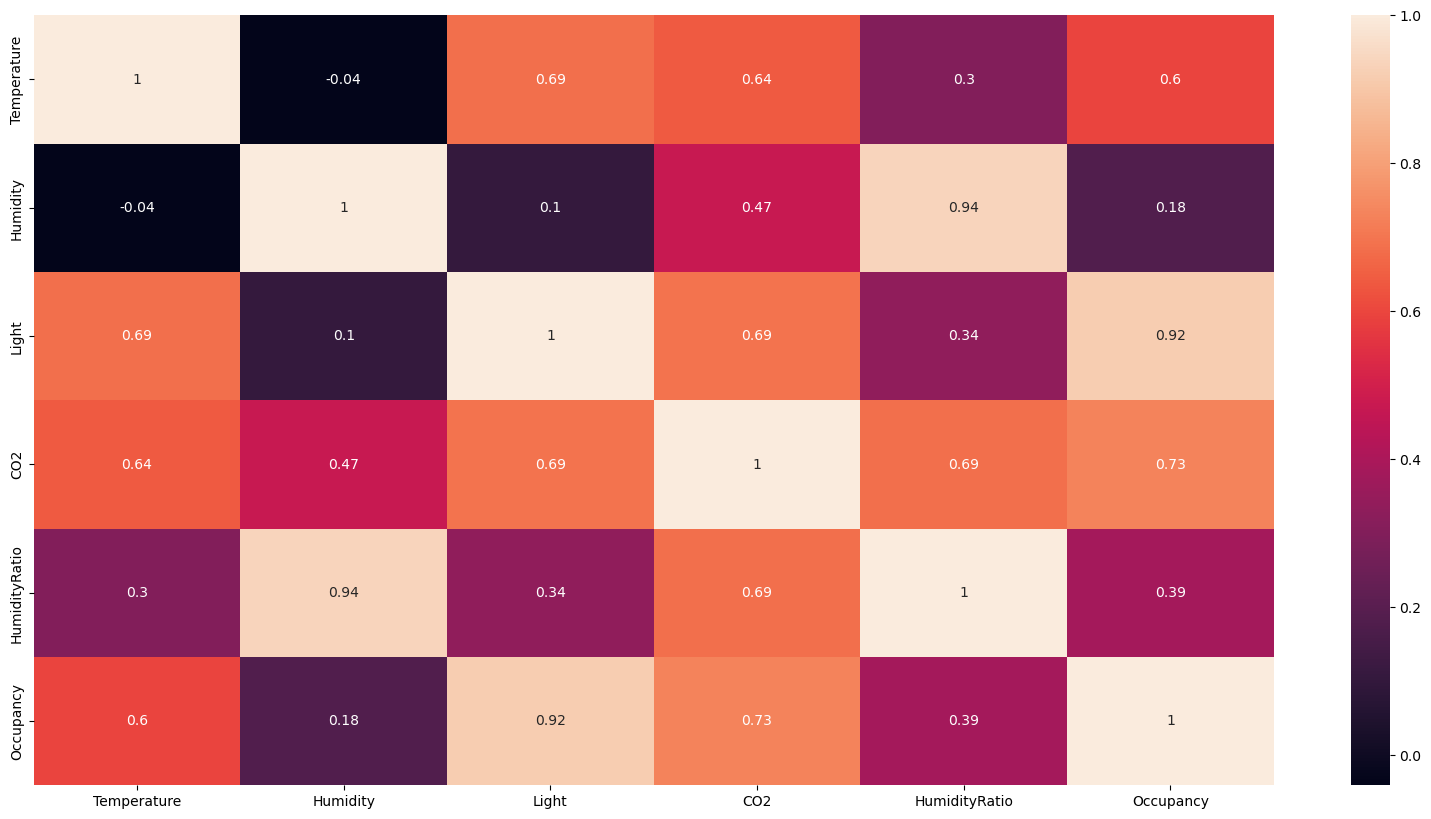

In [72]:
# Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(room.corr(),annot = True)
plt.show()

## Temperature and Occupancy

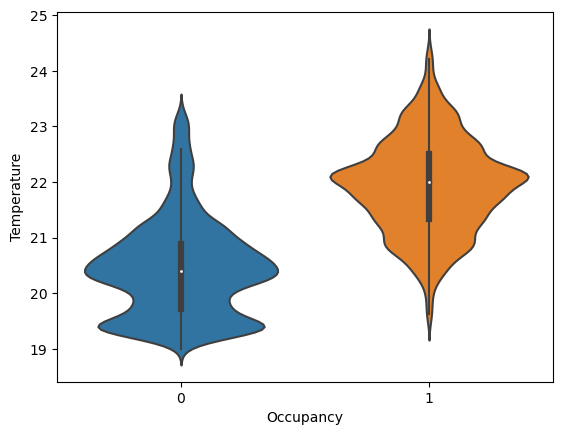

In [73]:
# Violineplot for Temperature

sns.violinplot(y = room['Temperature'], x = room['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Temperature')
plt.show()

## Light and Occupancy

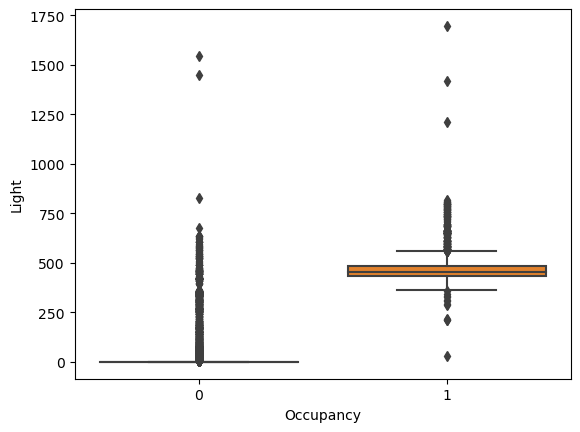

In [74]:
# Boxplot for Light

sns.boxplot(y = room['Light'], x = room['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()

## CO2 and Occupancy

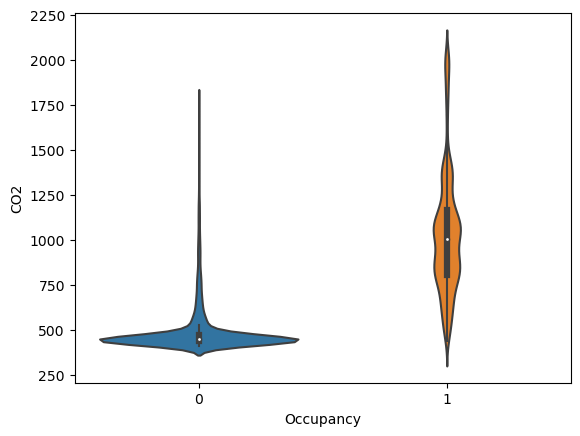

In [75]:
#violinlot for co2
sns.violinplot(y = room['CO2'],x = room['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('CO2')
plt.show()

# Data Preprocessing 2

In [76]:
#dropping columns humidity, date and humidity ratio
room.drop(['Humidity','date','HumidityRatio'],axis=1,inplace=True)

In [77]:
room.head(10)

,Temperature,Light,CO2,Occupancy
140,23.7000,585.200000,749.200000,1
141,23.7180,578.400000,760.400000,1
142,23.7300,572.666667,769.666667,1
143,23.7225,493.750000,774.750000,1
144,23.7540,488.600000,779.000000,1
145,23.7600,568.666667,790.000000,1
146,23.7300,536.333333,798.000000,1
147,23.7540,509.000000,797.000000,1
148,23.7540,476.000000,803.200000,1
149,23.7360,510.000000,809.000000,1


### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(room.drop(['Occupancy'],axis=1),room['Occupancy'],test_size=0.2,random_state=42)

### Model Building

#### Random Tree Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [82]:
#training the model
rfc.fit(x_train,y_train)
#training accuracy
rfc.score(x_train,y_train)

1.0

## Model Evaluation

In [83]:
rfc_pred = rfc.predict(x_test)

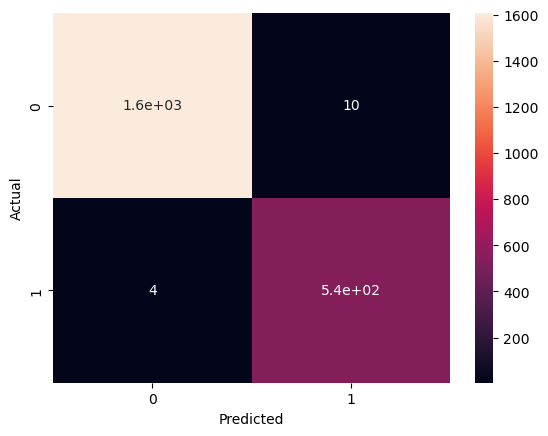

In [85]:
# Confusion metrix Heatmap.

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [86]:
import warnings
warnings.filterwarnings('ignore')

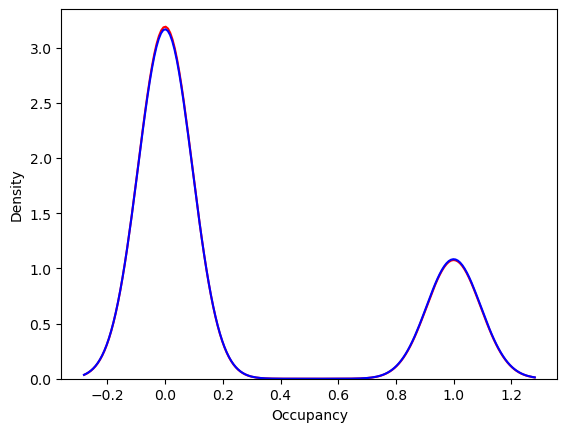

In [92]:
# Distributed plot for the predicted and actual values

ax = sns.distplot(y_test, hist = False, label = 'Actual', color = 'r')
sns.distplot(rfc_pred, hist = False, label = 'Predicted', color = 'b', ax = ax)
plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1617
           1       0.98      0.99      0.99       545

    accuracy                           0.99      2162
   macro avg       0.99      0.99      0.99      2162
weighted avg       0.99      0.99      0.99      2162



In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [98]:
print('Accuracy Score : ' +str(accuracy_score(y_test, rfc_pred)))
print('Precision Score : ' +str(precision_score(y_test, rfc_pred)))
print('Recall Score : ' +str(recall_score(y_test, rfc_pred)))
print('F1 Score : '+str(f1_score(y_test, rfc_pred)))

Accuracy Score : 0.9935245143385754
Precision Score : 0.9818511796733213
Recall Score : 0.9926605504587156
F1 Score : 0.9872262773722629


## Testing the model on new dataset

In [99]:
room_new = pd.read_csv('datatest2.csv')
room_new

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [100]:
# Dropping column humidity, date and humidity ration

room_new.drop(['Humidity', 'date', 'HumidityRatio'], axis = 1, inplace = True)

In [103]:
room_new.head()

,Temperature,Light,CO2,Occupancy
1,21.7600,437.333333,1029.666667,1
2,21.7900,437.333333,1000.000000,1
3,21.7675,434.000000,1003.750000,1
4,21.7675,439.000000,1009.500000,1
5,21.7900,437.333333,1005.666667,1


In [104]:
x = room_new.drop(['Occupancy'], axis = 1)
y = room_new['Occupancy']

In [105]:
#predicting the values
pred = rfc.predict(x)

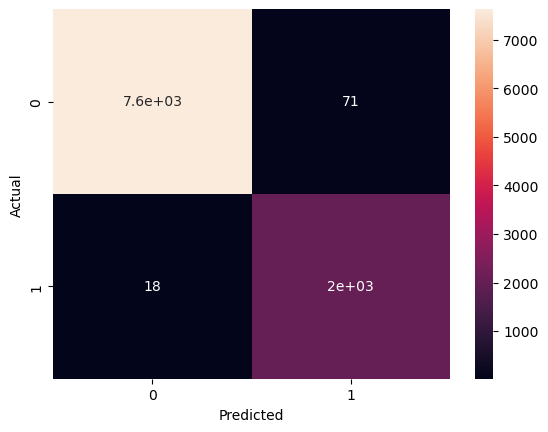

In [106]:
# Confusion matrix Heatmap

sns.heatmap(confusion_matrix(y,pred), annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

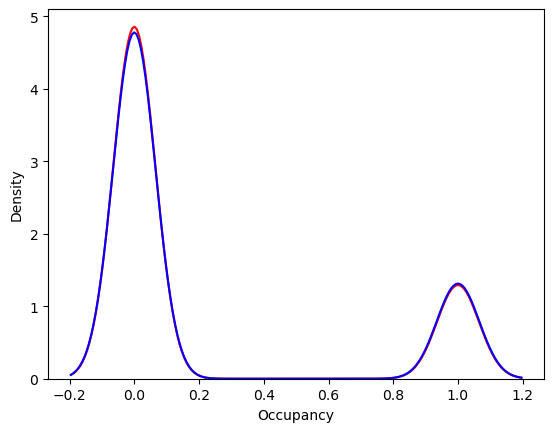

In [108]:
# Distribution Plot for the Predicted and an Actual Values:

ax = sns.distplot(y, hist = False, label = 'Actual', color = 'r')
sns.distplot(pred, hist = False, label = 'Predicted', color = 'b')
plt.show()

In [109]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



In [110]:
print('Accuracy Score : ' + str(accuracy_score(y,pred)))
print('Precision Score : ' + str(precision_score(y,pred)))
print('Recall Score : ' + str(recall_score(y,pred)))
print('F1 Score : ' + str(f1_score(y,pred)))

Accuracy Score : 0.9908736669401148
Precision Score : 0.9662226450999049
Recall Score : 0.9912152269399708
F1 Score : 0.9785593832811372


# Conclusion

From the above models we can see that the Random Forest Classifier has the highest accuracy score of 99%. Therefore we will be using the Random Forest Classifier for our final model. I also conclude that from the exploratory data analysis, it was found that the change in room temperature, CO levels and light intensity can be used to predict the occupancy of the room, inplace of humidity and humidity ratio.